# Practice of K-Means

* The tutorial website I refered to: https://ithelp.ithome.com.tw/articles/10187314

### Load The Data

In [4]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print(iris)    #This code is used to check the raw data

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Build The K-means Model

In [6]:
from sklearn import cluster, metrics

scoreMatrix = []

for kValue in range(2, 10):
    modelOfKM = cluster.KMeans(n_clusters = kValue).fit(iris['data'])
    resultOfKM = modelOfKM.labels_
    
    '''
    sameMatch = 0

    for j in range(0, len(resultOfKM)):    # Exchange the labels between 0 and 1.
        if resultOfKM[j] == 1:
            resultOfKM[j] = 0
        elif resultOfKM[j] == 0:
            resultOfKM[j] = 1

    # Calculate the accuracy manually        
    if len(resultOfKM) == len(iris['target']):
        for i in range(0, len(resultOfKM)):
            if resultOfKM[i] == iris['target'][i]:
                sameMatch += 1
            else:
                pass
            
    accuracyRateManually = sameMatch / len(resultOfKM)'''
    silhouetteScore = metrics.silhouette_score(iris['data'], resultOfKM)
    scoreMatrix.append(silhouetteScore)
    
    #print("Accuracy rate whe K is " + str(kValue) + " :\t" + str(accuracyRateManually))
    print("Silhouette Score when k is " + str(kValue) + " :\t" + str(silhouetteScore))

Silhouette Score when k is 2 :	0.6808136202713507
Silhouette Score when k is 3 :	0.5525919445213676
Silhouette Score when k is 4 :	0.49722797262968016
Silhouette Score when k is 5 :	0.48851755085386317
Silhouette Score when k is 6 :	0.37085617557938777
Silhouette Score when k is 7 :	0.348589592173392
Silhouette Score when k is 8 :	0.349443190077567
Silhouette Score when k is 9 :	0.36029269701027916


* The method of calculating the accuracy manually above is biased, while computer did not sure whether the order of label it gave was as the same as the order of label these data was given originally. Therefore, we use silhouette score to evaluate the accuracy instead which require the module of metrics. It is more stable.

* If the silhouette score was closed to 1, it means that the performance of K-means is better, vice versa.

* The result indicates that it proper for us to cluster these data with 2 groups.

### See The Trend Of Score with Module "matplotlib"

* The tutorial website I refered to: http://to52016.pixnet.net/blog/post/343529002-%5Bpython%5D-分群-k-means

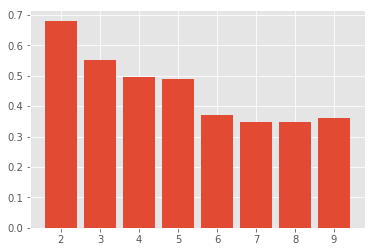

In [37]:
import matplotlib.pyplot as plot

# Examine the trend & relationship between Silhouette Score and K Value.
plot.style.use('ggplot')    # Change the style of the plot we want to draw.
plot.bar(range(2, 10), scoreMatrix)    # Draw a bar plot.
plot.show()

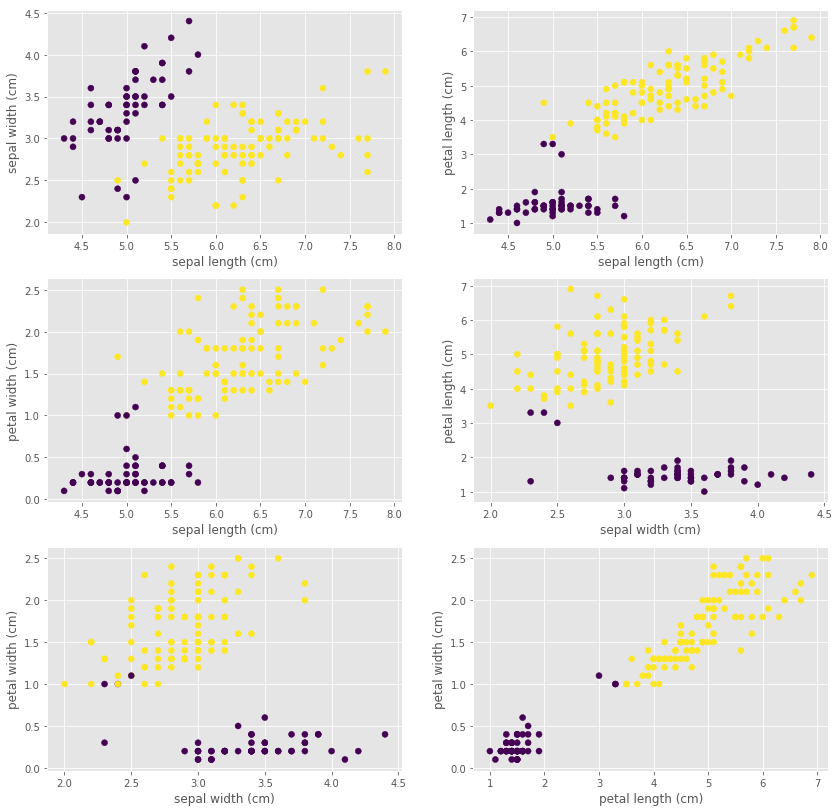

In [58]:
# Observe the clustering with different pairs of attributes.
plotOrder = 1
plot.figure(figsize=(14, 14))    # Determine the size of plot.

resultOfKM = cluster.KMeans(n_clusters = 2)
predictionOfKM = resultOfKM.fit_predict(iris['data'])    # Obtain the clusterings.

for e in range(0, len(iris['feature_names']) - 1):
    for f in range(1, len(iris['feature_names'])):
        if e < f:
            plot.subplot(3, 2, plotOrder)    # "plot.subplot" function could be used to assemble different diagrams into one diagram.
            plot.xlabel(iris['feature_names'][e])    # Name of horizontal label
            plot.ylabel(iris['feature_names'][f])    # Name of vertical label
            plot.scatter(iris['data'][:, e], iris['data'][:, f], c = predictionOfKM)    # "scatter" function could be used to draw scatter diagram, parameter "c" indicates color, which we used the result of prediction of clusterings here.
            plot.plot()
            plotOrder += 1
        else:
            pass

* Function "cluster.KMeans.fit()" was used to compute k-means clustering, so that we could know the Silhouette Score to determine the best number of K.

* Function "cluster.KMeans.fit_predict()" was used to compute cluster centers and predict cluster index for each sample, so that we could draw diagrams to see the distribution of clusterings.

* To get more information about the usage of cluster.KMeans function, please visit the website below: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

* To get more information about subplot with the application of module "matplotlib", please refer to the following website:
    https://morvanzhou.github.io/tutorials/data-manipulation/plt/4-1-subpot1/
    https://stackoverflow.com/questions/45861947/how-to-insert-the-text-below-subplot-in-matplotlib